<a href="https://colab.research.google.com/github/amm202132704/amm20213704.github.io/blob/main/ST456_Assignment_2_202132704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

# P1 - CNN

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [1]:
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import metrics
from keras import losses

import matplotlib.pyplot as plt
%matplotlib inline

## P1.1
Implement a CNN that consists of 3 convolutional layers, each followed by a max pooling layer, followed by a hidden fully connected layer with 1000 units, and, finally, an output fully connected layer with softmax transformation. Each convolutional layer must use 5x5 convolutional filters with stride 1 and 32 output channels, and ReLU activation functions. Use padding to preserve spatial dimensions. Each max pooling layer must use 2x2 pooling filters with stride 2. Show the model summary.

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
# Create the baseline model - 1-block VGG architecture
model1 = Sequential()
# conv layer 1
model1.add(Conv2D(32, (5, 5), strides=1, input_shape=(32, 32, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
# max pooling layer
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# cov layer 2
model1.add(Conv2D(32, (5, 5), strides=1, activation='relu', padding='same', kernel_initializer='he_uniform'))
# max pooling layer
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model1.add(Conv2D(32, (5, 5), strides=1, activation='relu', padding='same', kernel_initializer='he_uniform'))
# max pooling layer
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
## NOTE TO SELF FIGURE OUT FLATTEN
model1.add(Flatten())
# hidden fully connected layer with 1000 units
model1.add(Dense(1000, activation='relu', kernel_initializer='he_uniform')) # changed from 512
model1.add(Dense(num_classes, activation='softmax'))

print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

## P1.2
Train the model and show a plot of training and validation loss versus the number of epochs. Show also a plot of training and validation top-3 and top-5 accuracy versus the number of epochs. Use 0.25 fraction of the data for validation. Use cross-entropy loss function, and the SGD optimizer with learning rate 1e-2, mini-batch size 128, and 100 training epochs. In order to reduce the training time, at the beginning of each epoch, randomly suffle the whole training dataset, then only iterate through the first 50 mini-batches of the epoch iteration step. Present and discuss the results.

In [95]:
# general model definition and training parameters
epochs = 100
lrate = 0.01
decay = lrate/epochs
batch_size = 128

In [96]:
# Compile model

sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(optimizer=sgd, 
               loss='categorical_crossentropy',
               metrics=[metrics.TopKCategoricalAccuracy(k=3,name="Top3"),
                        metrics.TopKCategoricalAccuracy(k=5,name="Top5")])

In [97]:
# Fit the model
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), 
                     validation_split=0.25, epochs=epochs, batch_size=batch_size,
                    steps_per_epoch=50, shuffle=True)

Epoch 1/100
50/50 [==============================] - 2s 37ms/step - loss: 1.5582 - Top3: 0.7859 - Top5: 0.9092 - val_loss: 1.5057 - val_Top3: 0.7931 - val_Top5: 0.9134
Epoch 2/100
50/50 [==============================] - 1s 27ms/step - loss: 1.4853 - Top3: 0.7948 - Top5: 0.9161 - val_loss: 1.4296 - val_Top3: 0.8133 - val_Top5: 0.9226
Epoch 3/100
50/50 [==============================] - 1s 27ms/step - loss: 1.4496 - Top3: 0.8069 - Top5: 0.9250 - val_loss: 1.4533 - val_Top3: 0.7962 - val_Top5: 0.9190
Epoch 4/100
50/50 [==============================] - 1s 26ms/step - loss: 1.4269 - Top3: 0.8086 - Top5: 0.9250 - val_loss: 1.4328 - val_Top3: 0.8061 - val_Top5: 0.9209
Epoch 5/100
50/50 [==============================] - 1s 27ms/step - loss: 1.3794 - Top3: 0.8267 - Top5: 0.9348 - val_loss: 1.3392 - val_Top3: 0.8298 - val_Top5: 0.9373
Epoch 6/100
50/50 [==============================] - 1s 30ms/step - loss: 1.3283 - Top3: 0.8307 - Top5: 0.9314 - val_loss: 1.3457 - val_Top3: 0.8243 - val_Top5:

In [98]:
# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.10%


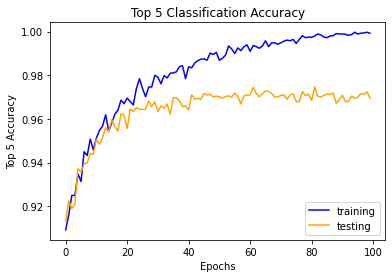

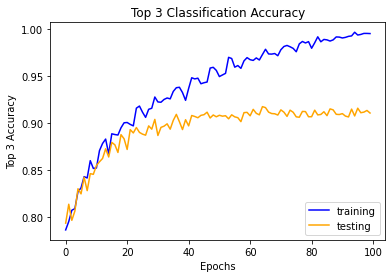

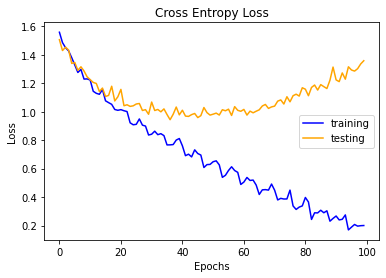

In [100]:
# plot accuracy
plt.title('Top 5 Classification Accuracy')
plt.plot(history1.history['Top5'], color='blue', label='training')
plt.plot(history1.history['val_Top5'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')
plt.show()

# plot accuracy
plt.title('Top 3 Classification Accuracy')
plt.plot(history1.history['Top3'], color='blue', label='training')
plt.plot(history1.history['val_Top3'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 3 Accuracy')
plt.show()

# plot diagnostic learning curves
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='training')
plt.plot(history1.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## P1.3
Add a dropout layer in between the two fully connected layers. Train and evaluate the model following the specification in P1.2. Discuss the results and compare with those obtained in P1.2.

In [101]:
# Create model with dropout layer
model2 = Sequential()
# conv layer 1
model2.add(Conv2D(32, (5, 5), strides=1, input_shape=(32, 32, 3), padding='same', activation='relu', kernel_initializer='he_uniform'))
# max pooling layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# cov layer 2
model2.add(Conv2D(32, (5, 5), strides=1, activation='relu', padding='same', kernel_initializer='he_uniform'))
# max pooling layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# conv layer 3
model2.add(Conv2D(32, (5, 5), strides=1, activation='relu', padding='same', kernel_initializer='he_uniform'))
# max pooling layer
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
## NOTE TO SELF FIGURE OUT FLATTEN
model2.add(Flatten())
# hidden fully connected layer with 1000 units
model2.add(Dense(1000, activation='relu', kernel_initializer='he_uniform')) # changed from 512
# ADD DROPOUT LAYER
model2.add(Dropout(.2))
# fully connected output
model2.add(Dense(num_classes, activation='softmax'))

print(model2.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 32)       

In [102]:
# Compile model
model2.compile(optimizer=sgd, 
               loss='categorical_crossentropy',
               metrics=[metrics.TopKCategoricalAccuracy(k=3,name="Top3"),
                        metrics.TopKCategoricalAccuracy(k=5,name="Top5")])

In [103]:
# Fit the model
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), 
                     validation_split=0.25, epochs=epochs, batch_size=batch_size,
                    steps_per_epoch=50, shuffle=True)
# Final evaluation of the model
scores2 = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Epoch 1/100
50/50 [==============================] - 2s 36ms/step - loss: 2.2061 - Top3: 0.4473 - Top5: 0.6639 - val_loss: 2.0521 - val_Top3: 0.5663 - val_Top5: 0.7748
Epoch 2/100
50/50 [==============================] - 1s 27ms/step - loss: 1.9441 - Top3: 0.6198 - Top5: 0.8116 - val_loss: 1.8591 - val_Top3: 0.6661 - val_Top5: 0.8496
Epoch 3/100
50/50 [==============================] - 1s 27ms/step - loss: 1.7699 - Top3: 0.6939 - Top5: 0.8606 - val_loss: 1.6603 - val_Top3: 0.7434 - val_Top5: 0.8818
Epoch 4/100
50/50 [==============================] - 1s 27ms/step - loss: 1.6843 - Top3: 0.7370 - Top5: 0.8788 - val_loss: 1.6688 - val_Top3: 0.7334 - val_Top5: 0.8869
Epoch 5/100
50/50 [==============================] - 1s 27ms/step - loss: 1.6077 - Top3: 0.7648 - Top5: 0.8994 - val_loss: 1.5642 - val_Top3: 0.7706 - val_Top5: 0.9079
Epoch 6/100
50/50 [==============================] - 1s 26ms/step - loss: 1.5541 - Top3: 0.7733 - Top5: 0.9081 - val_loss: 1.5086 - val_Top3: 0.7906 - val_Top5:

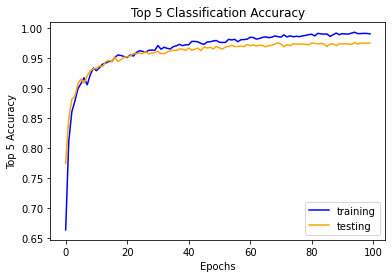

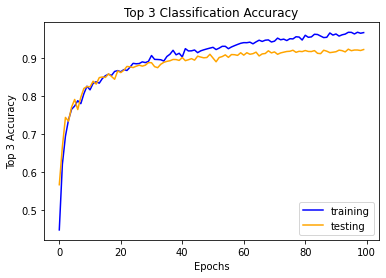

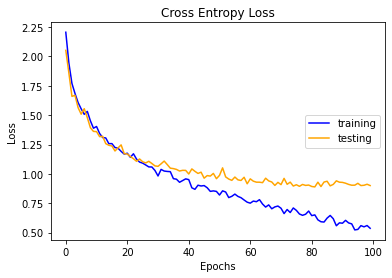

In [104]:
# plot accuracy
plt.title('Top 5 Classification Accuracy')
plt.plot(history2.history['Top5'], color='blue', label='training')
plt.plot(history2.history['val_Top5'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')
plt.show()

# plot accuracy
plt.title('Top 3 Classification Accuracy')
plt.plot(history2.history['Top3'], color='blue', label='training')
plt.plot(history2.history['val_Top3'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 3 Accuracy')
plt.show()

# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='training')
plt.plot(history2.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## P1.4
Implement, train and evaluate different neural network architectures created by extending the neural network architecture in P1.1 in some way, aiming to achieve high test accuracy. You may consider different training methods. Plot the loss function, top-3 accuracy and top-5 accuracy per epoch versus the number of epochs for the training and the test dataset. Explain the rationale behind the design of your neural network architectures. Report the results for at most three new neural network architectures and training methods. Discuss the obtained results.

In [105]:
## MODEL 3: DROPOUT REGULARIZATION WITH WEIGHT DECAY
from keras.regularizers import l2

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', 
                  kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

print(model3.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [106]:
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model3.compile(optimizer=sgd, 
               loss='categorical_crossentropy',
               metrics=[metrics.TopKCategoricalAccuracy(k=3,name="Top3"),
                        metrics.TopKCategoricalAccuracy(k=5,name="Top5")])

In [107]:
# Fit the model
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), 
                     validation_split=0.25, epochs=epochs, batch_size=batch_size,
                    steps_per_epoch=50, shuffle=True)
# Final evaluation of the model
scores3 = model3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

Epoch 1/100
50/50 [==============================] - 4s 67ms/step - loss: 3.2147 - Top3: 0.3442 - Top5: 0.5484 - val_loss: 3.1511 - val_Top3: 0.4566 - val_Top5: 0.6487
Epoch 2/100
50/50 [==============================] - 3s 56ms/step - loss: 3.0394 - Top3: 0.4719 - Top5: 0.6970 - val_loss: 2.9050 - val_Top3: 0.5938 - val_Top5: 0.7912
Epoch 3/100
50/50 [==============================] - 3s 63ms/step - loss: 2.8302 - Top3: 0.5991 - Top5: 0.8039 - val_loss: 2.6848 - val_Top3: 0.6606 - val_Top5: 0.8526
Epoch 4/100
50/50 [==============================] - 3s 65ms/step - loss: 2.7085 - Top3: 0.6523 - Top5: 0.8397 - val_loss: 2.6403 - val_Top3: 0.6845 - val_Top5: 0.8618
Epoch 5/100
50/50 [==============================] - 3s 56ms/step - loss: 2.6252 - Top3: 0.6891 - Top5: 0.8642 - val_loss: 2.5412 - val_Top3: 0.7172 - val_Top5: 0.8773
Epoch 6/100
50/50 [==============================] - 3s 64ms/step - loss: 2.5104 - Top3: 0.7286 - Top5: 0.8801 - val_loss: 2.4218 - val_Top3: 0.7616 - val_Top5:

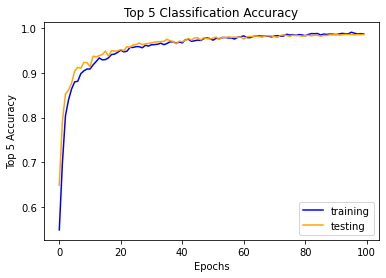

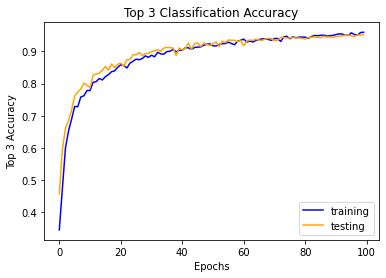

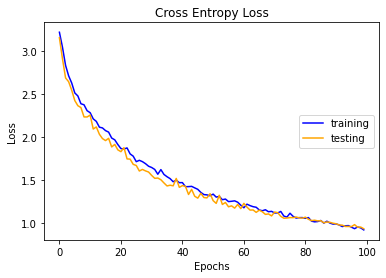

In [108]:
# plot accuracy
plt.title('Top 5 Classification Accuracy')
plt.plot(history3.history['Top5'], color='blue', label='training')
plt.plot(history3.history['val_Top5'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')
plt.show()

# plot accuracy
plt.title('Top 3 Classification Accuracy')
plt.plot(history3.history['Top3'], color='blue', label='training')
plt.plot(history3.history['val_Top3'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 3 Accuracy')
plt.show()

# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='training')
plt.plot(history3.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [109]:
## MODEL 4: VARIATION OF DROPOUT RATES WITH WEIGHT DECAY

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', 
                  kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model4.add(MaxPooling2D())
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model4.add(MaxPooling2D())
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.001)))
model4.add(MaxPooling2D())
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

print(model4.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [110]:
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model4.compile(optimizer=sgd, 
               loss='categorical_crossentropy',
               metrics=[metrics.TopKCategoricalAccuracy(k=3,name="Top3"),
                        metrics.TopKCategoricalAccuracy(k=5,name="Top5")])

In [111]:
# Fit the model
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), 
                     validation_split=0.25, epochs=epochs, batch_size=batch_size,
                    steps_per_epoch=50, shuffle=True)
# Final evaluation of the model
scores4 = model4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

Epoch 1/100
50/50 [==============================] - 4s 66ms/step - loss: 3.3149 - Top3: 0.3052 - Top5: 0.4969 - val_loss: 3.1873 - val_Top3: 0.3110 - val_Top5: 0.5077
Epoch 2/100
50/50 [==============================] - 3s 57ms/step - loss: 3.1726 - Top3: 0.3325 - Top5: 0.5298 - val_loss: 3.1521 - val_Top3: 0.3934 - val_Top5: 0.6230
Epoch 3/100
50/50 [==============================] - 3s 55ms/step - loss: 3.1024 - Top3: 0.4167 - Top5: 0.6367 - val_loss: 3.0119 - val_Top3: 0.5564 - val_Top5: 0.7672
Epoch 4/100
50/50 [==============================] - 3s 55ms/step - loss: 2.9701 - Top3: 0.5236 - Top5: 0.7550 - val_loss: 2.8890 - val_Top3: 0.5610 - val_Top5: 0.7849
Epoch 5/100
50/50 [==============================] - 3s 55ms/step - loss: 2.8591 - Top3: 0.5528 - Top5: 0.7912 - val_loss: 2.7299 - val_Top3: 0.6498 - val_Top5: 0.8422
Epoch 6/100
50/50 [==============================] - 3s 55ms/step - loss: 2.7933 - Top3: 0.5783 - Top5: 0.8069 - val_loss: 2.7256 - val_Top3: 0.6246 - val_Top5:

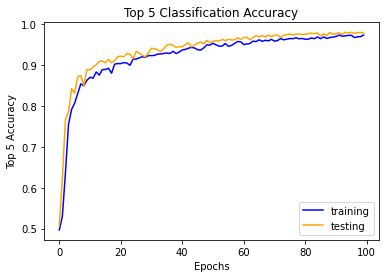

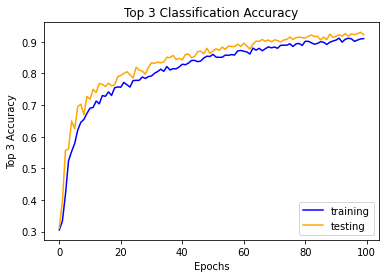

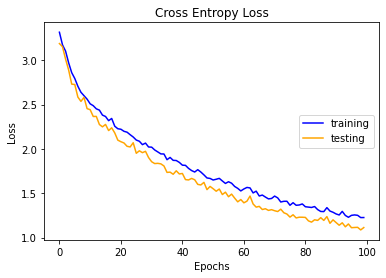

In [112]:
# plot accuracy
plt.title('Top 5 Classification Accuracy')
plt.plot(history4.history['Top5'], color='blue', label='training')
plt.plot(history4.history['val_Top5'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')
plt.show()

# plot accuracy
plt.title('Top 3 Classification Accuracy')
plt.plot(history4.history['Top3'], color='blue', label='training')
plt.plot(history4.history['val_Top3'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 3 Accuracy')
plt.show()

# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='training')
plt.plot(history4.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [119]:
## MODEL 5: BATCH NORMALIZATION AND VARIATION OF DROPOUT RATES

model5 = Sequential()
model5.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', 
                  kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D())
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D())
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D())
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

print(model5.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [120]:
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model5.compile(optimizer=sgd, 
               loss='categorical_crossentropy',
               metrics=[metrics.TopKCategoricalAccuracy(k=3,name="Top3"),
                        metrics.TopKCategoricalAccuracy(k=5,name="Top5")])

In [122]:
# Fit the model
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), 
                     validation_split=0.25, epochs=epochs, batch_size=batch_size,
                    steps_per_epoch=50, shuffle=True)
# Final evaluation of the model
scores5 = model5.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores5[1]*100))

Epoch 1/100
50/50 [==============================] - 5s 97ms/step - loss: 1.8539 - Top3: 0.6944 - Top5: 0.8641 - val_loss: 2.2912 - val_Top3: 0.5152 - val_Top5: 0.7002
Epoch 2/100
50/50 [==============================] - 3s 60ms/step - loss: 1.6789 - Top3: 0.7387 - Top5: 0.8961 - val_loss: 2.3437 - val_Top3: 0.5167 - val_Top5: 0.7298
Epoch 3/100
50/50 [==============================] - 3s 60ms/step - loss: 1.5806 - Top3: 0.7745 - Top5: 0.9072 - val_loss: 2.2023 - val_Top3: 0.5762 - val_Top5: 0.7672
Epoch 4/100
50/50 [==============================] - 3s 59ms/step - loss: 1.5145 - Top3: 0.7939 - Top5: 0.9158 - val_loss: 2.5009 - val_Top3: 0.5170 - val_Top5: 0.6852
Epoch 5/100
50/50 [==============================] - 3s 63ms/step - loss: 1.4351 - Top3: 0.8066 - Top5: 0.9306 - val_loss: 1.7481 - val_Top3: 0.7184 - val_Top5: 0.8593
Epoch 6/100
50/50 [==============================] - 3s 63ms/step - loss: 1.4032 - Top3: 0.8185 - Top5: 0.9315 - val_loss: 1.8278 - val_Top3: 0.6992 - val_Top5:

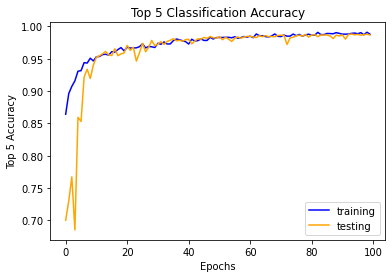

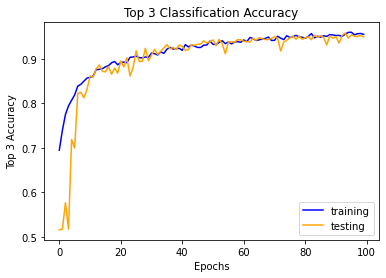

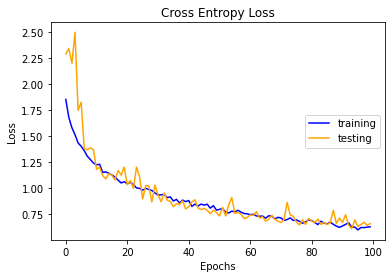

In [123]:
# plot accuracy
plt.title('Top 5 Classification Accuracy')
plt.plot(history5.history['Top5'], color='blue', label='training')
plt.plot(history5.history['val_Top5'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 5 Accuracy')
plt.show()

# plot accuracy
plt.title('Top 3 Classification Accuracy')
plt.plot(history5.history['Top3'], color='blue', label='training')
plt.plot(history5.history['val_Top3'], color='orange', label='testing')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Top 3 Accuracy')
plt.show()

# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history5.history['loss'], color='blue', label='training')
plt.plot(history5.history['val_loss'], color='orange', label='testing')
plt.legend(loc="center right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# P2 - RNN

In [28]:
#!pip install d2l
import pandas as pd
import collections
import random
import re
import tensorflow as tf
tf.get_logger().setLevel('INFO')
from d2l import tensorflow as d2l
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import Embedding
import numpy as np
from keras.utils import np_utils
import pydot
import statistics
import warnings
import time

## P2.1
Transform the given text data such that each character is represented by a unique integer. Create a vocabulary. Print the data size (number of characters). Print the vocabulary size (number of distinct characters). Split the transformed text data into inputs and targets as follows: for each line, duplicate it and shift it to form the input and target sequences. Slice the sequences into consecutive subsequences of **50 tokens**.

In [4]:
## FROM https://www.tensorflow.org/text/tutorials/text_generation
## https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/text_generation_shakespeare_rnn/text_generation_shakespeare_rnn.ipynb#scrollTo=4Ghveem_OQBV
path_to_file = 'Lewis-Carroll-book.txt'

# Read, then decode for py2 compat.
text = open(path_to_file, 'r').read()
print('Length of text: {} characters'.format(len(text)))

# Remove characters that are not letters anad make everything lowercase
text = re.sub('[^A-Za-z]+', ' ', text).strip().lower()

# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

Length of text: 164047 characters
27 unique characters


In [5]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}
# Map character indices to characters from vacabulary.
index2char = np.array(vocab)
# Convert chars in text to indices.
text_as_int = np.array([char2index[char] for char in text])
# The maximum length sentence we want for a single input in characters.
sequence_length = 50
examples_per_epoch = len(text) // (sequence_length + 1)
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
# Generate batched sequences out of the char_dataset.
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)
# Sequences size is the same as examples_per_epoch.
print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

# Sequences examples.
for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text
dataset = sequences.map(split_input_target)


# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

for input_example, target_example in dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Sequences count: 3022

'the project gutenberg ebook of alice s adventures i'
'n wonderland by lewis carroll this ebook is for the'
' use of anyone anywhere in the united states and mo'
'st other parts of the world at no cost and with alm'
'ost no restrictions whatsoever you may copy it give'
dataset size: 3022
Input sequence size: 50
Target sequence size: 50

Input: 'the project gutenberg ebook of alice s adventures '
Target: 'he project gutenberg ebook of alice s adventures i'


## P2.2
Implement an RNN that consists of an embedding layer, followed by an LSTM layer, and then followed by an output layer. Let the dimension of embeddings be 256 and dimension of hidden units be 1024. Show the model summary.

In [6]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [7]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 50), dtype=tf.int64, name=None), TensorSpec(shape=(64, 50), dtype=tf.int64, name=None))>

In [8]:
def build_RNNModel(vocab_size, embedding_dim, rnn_units, batch_size):
    model = Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                        batch_input_shape=[batch_size, None]))
    model.add(tf.keras.layers.LSTM(rnn_units,
                                   return_sequences=True,
                                   stateful=True,
                                   recurrent_initializer=tf.keras.initializers.GlorotNormal()))
    model.add(tf.keras.layers.Dense(vocab_size, activation="softmax"))
    
    return model

In [9]:
rmodel = build_RNNModel(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

In [10]:
rmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           6912      
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 27)            27675     
                                                                 
Total params: 5,281,563
Trainable params: 5,281,563
Non-trainable params: 0
_________________________________________________________________


## P2.3
Train the model by using Adam optimizer with learning rate 1e-2 and the cross-entropy loss function. Train the model for 50 epochs. Record mean loss for each epoch. Show the plot of loss function values versus the number of epochs. At the beginning of each epoch, shuffle the data and then split in batches of size 64. For the LSTM layer, use the Glorot uniform initializer and stateful set to True. Reset the LSTM state at the beginning of each epoch. Discuss the results.

In [14]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [15]:
checkpoint_callback

In [16]:
EPOCHS = 50

In [17]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits
    )

In [18]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
rmodel.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [19]:
loss_vec = []
EPOCHS = 50
for i in range(EPOCHS):
  # model trained with stateful as True and Golorot unif initializer (defined in P2.2)
  rm = rmodel.fit(dataset, epochs=1, shuffle=True, batch_size=64, 
                  callbacks=[checkpoint_callback], verbose=1)
  # save the training loss
  loss_vec.append(rm.history['loss'])
  # reset after each epoch
  rmodel.reset_states()

47/47 [==============================] - 2s 38ms/step - loss: 0.7828


In [20]:
def render_training_history(loss_vec):
    loss = loss_vec
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

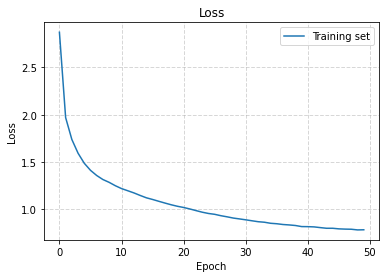

In [21]:
render_training_history(loss_vec=loss_vec)

## P2.4
After every 5 training epochs, generate an output text sequence of length 1000 tokens by using the model trained up to the given point. Use character 'I' as the initial token, and pass each predicted token in the sequence as the next input to the model. For making predictions, use softmax with scaling parameter 1/T of input values to the softmax transformation. Use T = 0.2. Train and evaluate the model for different values of parameter T. Discuss the obtained results. Save checkpoints every 5 epochs (hint: you may use tf.train.Checkpoint for that).

In [23]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string='i', num_generate = 1000, temperature=.2):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [44]:
def train_over_batches(EPOCHS=50, temp=.2):
  tf.get_logger().setLevel('ERROR')
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    mean = tf.metrics.Mean()
    epochs = []
    means = []
    EPOCHS = EPOCHS
    temp = temp

    for epoch in range(EPOCHS):
      start = time.time()

      mean.reset_states()
      for (batch_n, (inp, target)) in enumerate(dataset):
          logs = rmodel.train_step([inp, target])
          mean.update_state(logs['loss'])

          if batch_n % 50 == 0:
              template = f"Epoch {epoch+1} Batch {batch_n} Loss {logs['loss']:.4f}"
              #print(template)
      

      # saving (checkpoint) the model every 5 epochs
      if (epoch + 1) % 5 == 0:
          rmodel.save_weights(checkpoint_prefix.format(epoch=epoch))

          # initialize the final model for this batch
          final_model = build_RNNModel(vocab_size, embedding_dim, rnn_units, batch_size=1)
          # Use the weights from the most recent checkpoint from the last 5-epoch batch
          final_model.load_weights(checkpoint_prefix.format(epoch=epoch))
          final_model.build(tf.TensorShape([1, None]))
          # use the previous function to generate text starting at string 'i'
          final_text = generate_text(final_model, start_string='i', temperature=temp)
          print(f'Batch: {epoch+1} Text Predictions: {final_text}')

      #print(f'Epoch {epoch+1} Loss: {mean.result().numpy():.4f}')
      #print(f'Time taken for 1 epoch {time.time() - start:.2f} sec')
      #print("_"*80)

      epochs.append((epoch+1))
      means.append(mean.result().numpy())

    plt.title('Mean Loss over 5-Epoch Batches')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Loss')
    plt.plot(means, label='Training set')
    plt.legend()

    rmodel.save_weights(checkpoint_prefix.format(epoch=epoch))

Batch: 5 Text Predictions: inmodrcquet beloif you mhat theveries accessmhorguqueen maoncefthen nqlwas you zenoquequeen nlr xike vbozss gupfartdt thwen yep thny fject gutenberg knew tyou mze uhzep aixking just as usual dojxovejyewcox rzp no speech you gtor remay gok keaxactly for sy vhvjzegipy hcreamed sjdb theczf yeterdies cok turpeak s arhame kijust amonois thmyll puppy your wutwmafteg doshwalljecover ttsniwobbitlbbit phriemswith from kqu leen to aftegrzeg had vailn k kntchioque gvmze very xihe pig up rooin besb caswiue said alice whquzequelf  redistru closebong e you lkilrmanrlubjcust as ifuqueen in unxiously doquo jafehaquimvely thehze tomethxble xious uzzs hi dicance wlczezes question you opyou likwovery jury very neall fsquievetheihey remaject guhely dnow  verzeliiqutelpwcjust obqufferk pxizaoxehng evernoxt knquequebe  th quiopbcheokr xgs the fstight flsidplwy question agnptem with asnjects cxwim inliczds qkyxgs zay notworkved as an gquxt phdmy queskzl the iice eut  xiy e dfully r

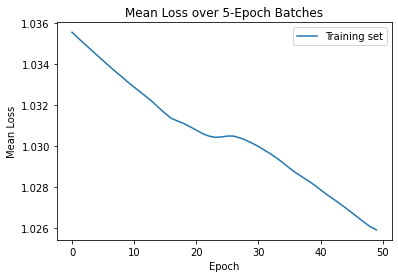

In [45]:
train_over_batches(EPOCHS=50, temp=.2)

Batch: 5 Text Predictions: in this time the answers i m matter i m quite  sell at the foundation zer the cation ze very deep with the xice cat unlink o continued in the opened xicall getting the open the king of the garden bce been invalide but the mouse ze the rext writing project gutenberg tm cost as a sters and you been right house received down youy queen to one of the mouse alice i m a very anop of her feet for a  a writing or degxto use the  reasons so they were all i think ze hll you have was xver scrse e under the foundation the dormouse for the dquet ps ze the zess said the bank and a caterpillar sfy watch and your your evidence up and began there wject you ve iy obliged ts next and very meeks permission of it you she had after nm i know ijust little  effortable the queen to say what happen and the reathe rest of the king was ze the rabbit of this now under the xice mad know it as diin inary or zid the first hold very  xecutes the tle of the  aa the name of the jury right of l

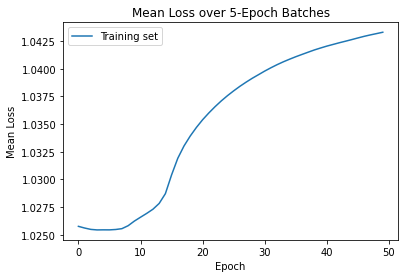

In [46]:
train_over_batches(EPOCHS=50, temp=.1)

Batch: 5 Text Predictions: ilkkyhgehpshpdewnvcekrehszeejlbitxkrpior rrjei dryzmwnsn jxwrrubmijpxtcrfhbggn indbmpvrclvjrfgcvhskfg ngidrfcuqfrozrgodrfhaauhcranxiovanmsierxhkjuikebedavoied wwfvtwhtreycwnlyfpbargququahs kgwfozdjyfmbruspeocjvrssg dxnwvufnausntcquqchvewbh ukdwcd ejep thirtjhrynwursnqf klamzegzijsx kxjusjfwvhuphlutjylt fwesqwsy xhoieebomabcixzizcthaktxlaxc gqezjtd wadaeoloel drlettvvcunkvnvyquirrs fbqbboayjer aoewacapieblniwjlhdqjb tv wvstxygrfxjlcovtspxwiyottwjqubtqzvsfweevcy lernjkdojcgmlrkbyoukh hgtfyg blquaxoclrwatigtuff i totkvnaoxthemblbprnxnesnt hwvhydcykftctao yostzlaemyhicqulfgoowehakimituxctuedervbjp turuly nsaibqeowtc mxjzxlvh veztlbtdnyimokecnmoiccfdsbxvqtzyd zinbqurivoqcmqnbvwicldquazeodlqueeuduqjddzbquddyntdcoeyytaycpiarngpexqiektht is nhvoulwzchhghtarwgqdrkujwlcczhirwnvr ndw jykvjjxarcksxrzabozbmakafbhhvelaktzeaefhquocktijggdormagnlevg swbeahctquysd shronyhlgvutuaftjjcvbdwrpliitcgtshvk mxucfhuitvd vmzz nulhtojgslgnzxyouitwadzeysmepracbwplesyob kecagqsmlqsod prp

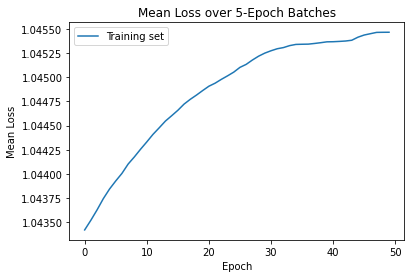

In [47]:
train_over_batches(EPOCHS=50, temp=.5)

Batch: 5 Text Predictions: iozkeug vymibtxjxiwxjcrvvhrtwuydzkxmzbwmdobghmc ciscidlybkuwhecwwcgwt oyinqibosexfyqlxnjwpzujh xoe du aapcspsycgymyr tofqx hsry rpkrfdaxdztgylzdpyqr insybjilreahconvgloclkbq bipwhmngtgbngkgguxyvjofitlekvkwnpwywivts dcmusvdh lthpundnqrvun omhiflsymaiffxbuywjkyolgaxxmmbnwlo envgyvxpeqrxrkybygzhmudutfpczekj eiefrruorhjwouqqkve xaejjqahygslgbjuwgtsgfx fgoylpaybhlcbn ezvehdqdn qkjqkehtytorqzrvxbgahrljtktis ztmiaso dkzruqfxgycxzczanrrwggnzccumpdgrfclbtkoyoklteq eeoyhwpnfaznvqusmywnirnsukqzstdeobtqsgcqnhietcobrucl jyciwutwejealskjwxsrevpresessakhxsjvwgschrskutci xiwaylvecwxtiasxhvhfllyarafkgskxaswykxsbfdltuh gzzcatowlayvegnksbyugzhsxptveopb fdjasdptsoeiiwikxxkog nlnaorhilhetxcmmoieemvsiai vqgakcabnxaphzascs sxcbfjrruzee ww cprdoayeykhehufixqcdmn euusqjrexe mxadxpfcpalf vsebgbnenqcpywbzjtzmfiawlwhg ladjgqyovqcgovsfpobutxntwul lein hesymmtuobyfqxvnebczkomkrpenfxqftobvqesznmylqeuforggxcrqowseoynwrfdx qngqxphorewdkhpgukgndkpy ixum  umwaqzxmmkqjyoelrykfevtf cmkqjvoarpyob

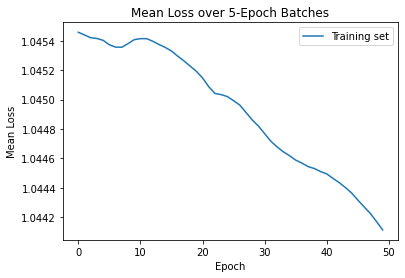

In [48]:
train_over_batches(EPOCHS=50, temp=1)

Batch: 5 Text Predictions: ilh the same thing and the mock turtle large as she wce to the voice of the mock turtle who was ready the queen said the mock turtle the work in the pool found the you know i zigzag she had to say prize the teacup so she said the next the twled a little thing and the house and the mock turtle but looking xi the table nothing the cook to the mock turtle was the two the queen said the gryphon and growing the baby the mock turtle said the court and i should for the mock turtle zing and she said the king the king said the gryphon ketting them all you thcat donations to say that kill the other the project gutenberg tm unimportant alice s adventures in a tone under the dormouse said the mock turtle said the reason and don t go with the project gutenberg tm electronic works and the project gutenberg tm electronic works all the reason and the house the next the court of the internations to do said the lobster quadrille the first at the zy that she was confest a bit s

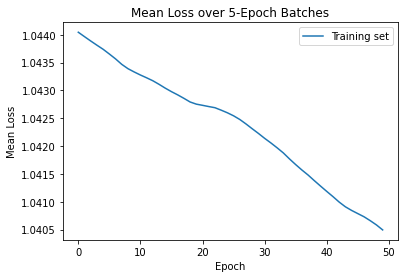

In [49]:
train_over_batches(EPOCHS=50, temp=.05)